In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pymaceutical_df = pd.merge(clinical_data,mouse_drug_data,on="Mouse ID", how="left")

# Display the data table for preview
pymaceutical_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [21]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupped_drug = pymaceutical_df.groupby(["Drug",'Timepoint'])
# Convert to DataFrame
mean_tumor_vol=pd.DataFrame(groupped_drug.mean()['Tumor Volume (mm3)'])
# Preview DataFrame
mean_tumor_vol.head(15)


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049

In [74]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
groupped_drug = pymaceutical_df.groupby(["Drug",'Timepoint'])
# Convert to DataFrame
mean_tumor_sem=pd.DataFrame(groupped_drug.sem()['Tumor Volume (mm3)'])
# Preview DataFrame
mean_tumor_sem.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358

In [75]:
# Minor Data Munging to Re-Format the Standard Error Data Frames
mean_tumor_sem.reset_index(inplace=True)
pivot_mer=mean_tumor_sem.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
pivot_mer.reset_index(inplace=True)
# Preview that Reformatting worked
pivot_mer

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


In [23]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol.reset_index(inplace=True)
pivot_mtv=mean_tumor_vol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
pivot_mtv.reset_index(inplace=True)
# Preview that Reformatting worked
pivot_mtv

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


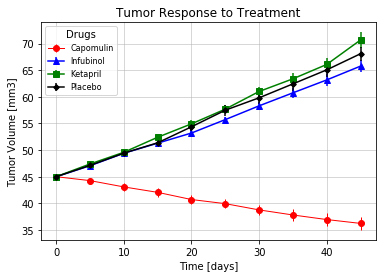

In [117]:
Drugs=['Capomulin', 'Infubinol', 'Ketapril','Placebo']
#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)
#set the plot title, and axis titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Tumor Volume [mm3]")
# set the x
x=pivot_mtv["Timepoint"]

#plot the "mean" list vs. the established x axis with error 
capLine = plt.errorbar(x, pivot_mtv["Capomulin"], yerr=pivot_mer["Capomulin"], color="r",marker='o',linewidth=1)
infLine = plt.errorbar(x, pivot_mtv["Infubinol"], yerr=pivot_mer["Infubinol"],color="b",marker='^')
ketLine = plt.errorbar(x, pivot_mtv["Ketapril"], yerr=pivot_mer["Ketapril"],color="g",marker='s')
plaLine = plt.errorbar(x, pivot_mtv["Placebo"], yerr=pivot_mer["Placebo"],color="black",marker='D',markersize=4)

#add grid lines to graph 
plt.grid('on', which='major', axis='both', linestyle='-', linewidth=0.5)

# Create a legend
legend = plt.legend(fontsize = 8, title= "Drugs", loc="upper left")
#save and show the resulting figure
plt.savefig("Tumor Response to Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [86]:
# Store the Mean Metastatic Sites grouped by Drug and Timepoint 
groupped_drug = pymaceutical_df.groupby(["Drug",'Timepoint'])
# Convert to DataFrame
mean_met_site=pd.DataFrame(groupped_drug.mean()['Metastatic Sites'])
# Preview DataFrame
mean_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [90]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
groupped_drug = pymaceutical_df.groupby(["Drug",'Timepoint'])
# Convert to DataFrame
mean_met_site_sem=pd.DataFrame(groupped_drug.sem()['Metastatic Sites'])
# Preview DataFrame
mean_met_site_sem.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591

In [94]:
# Minor Data Munging to Re-Format the Standard Error Data Frames
mean_met_site_sem.reset_index(inplace=True)
pivot_mser=mean_met_site_sem.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
pivot_mser.reset_index(inplace=True)
# Preview that Reformatting worked
pivot_mser.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [93]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site.reset_index(inplace=True)
pivot_mms=mean_met_site.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
pivot_mms.reset_index(inplace=True)
# Preview that Reformatting worked
pivot_mms.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


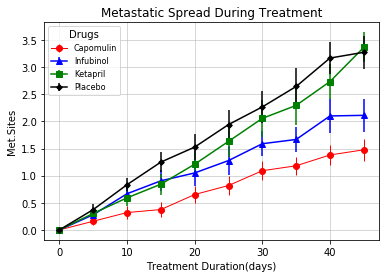

In [118]:
# Generate the Plot (with Error Bars)
Drugs=['Capomulin', 'Infubinol', 'Ketapril','Placebo']
#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)
#set the plot title, and axis titles
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration(days)")
plt.ylabel("Met.Sites")
# set the x and xerr
x=pivot_mms["Timepoint"]

#plot the "mean" list vs. the established x axis with error 
capLine = plt.errorbar(x, pivot_mms["Capomulin"], yerr=pivot_mser["Capomulin"], color="r",marker='o',linewidth=1)
infLine = plt.errorbar(x, pivot_mms["Infubinol"], yerr=pivot_mser["Infubinol"],color="b",marker='^')
ketLine = plt.errorbar(x, pivot_mms["Ketapril"], yerr=pivot_mser["Ketapril"],color="g",marker='s')
plaLine = plt.errorbar(x, pivot_mms["Placebo"], yerr=pivot_mser["Placebo"],color="black",marker='D',markersize=4)

#add grid lines to graph 
plt.grid('on', which='major', axis='both', linestyle='-', linewidth=0.5)

# Create a legend
legend = plt.legend(fontsize = 8, title= "Drugs", loc="upper left")
#save and show the resulting figure
plt.savefig("Tumor Response to Treatment.png")
plt.show()

## Survival Rates

In [112]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
groupped_drug = pymaceutical_df.groupby(["Drug",'Timepoint'])
# Convert to DataFrame
sr=pd.DataFrame(groupped_drug["Drug"].count())
#rename the column
sr.rename(columns={'Drug':'Mouse Count'}, inplace=True)
# Preview DataFrame
sr.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [126]:
# Minor Data Munging to Re-Format the Data Frames
sr.reset_index(inplace=True)
pivot_sr=sr.pivot(index="Timepoint", columns="Drug", values="Mouse Count")
pivot_sr.reset_index(inplace=True)
# Preview that Reformatting worked
pivot_sr.head(20)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


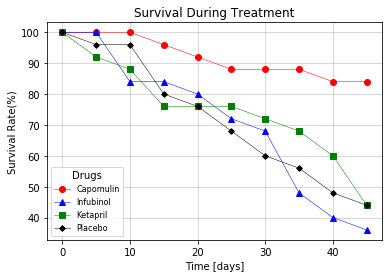

In [125]:
# Generate the Plot (Accounting for percentages)
Drugs=['Capomulin', 'Infubinol', 'Ketapril','Placebo']
#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)
#set the plot title, and axis titles
plt.title("Survival During Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Survival Rate(%)")
# set the x
x=pivot_sr["Timepoint"]

#plot the "mean" list vs. the established x axis with error 
capLine = plt.plot(x, pivot_sr["Capomulin"]/25*100, color="r",marker='o',linewidth=0.5)
infLine = plt.plot(x, pivot_sr["Infubinol"]/25*100,color="b",marker='^',linewidth=0.5)
ketLine = plt.plot(x, pivot_sr["Ketapril"]/25*100, color="g",marker='s',linewidth=0.5)
plaLine = plt.plot(x, pivot_sr["Placebo"]/25*100,color="black",marker='D',markersize=4,linewidth=0.5)

#add grid lines to graph 
plt.grid('on', which='major', axis='both', linestyle='-', linewidth=0.5)

# Create a legend
legend = plt.legend(fontsize = 8, title= "Drugs", loc="lower left")
#save and show the resulting figure
plt.savefig("Survival During Treatment.png")

plt.show()

## Summary Bar Graph

In [159]:
# Calculate the percent changes for each drug
tumor_vol_change_pct =  ((pivot_mtv.iloc[-1]-pivot_mtv.iloc[0])/pivot_mtv.iloc[0]) * 100
tumor_vol_change_pct=tumor_vol_change_pct.drop(["Timepoint"])
tumor_vol_change_pct
# Display the data to confirm
tvcp=pd.DataFrame(tumor_vol_change_pct, columns= list("p"))
tvcp

,p
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [185]:
# Store all Relevant Percent Changes into a Tuple
pc_tuple = (tvcp.iloc[[0,2,3,5]])
pc_tuple['p']

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Name: p, dtype: float64

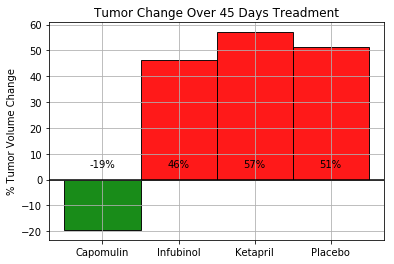

In [213]:
# plot bar chart of overall tumor change
Drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x_axis =Drugs             
c = ["g", "r", "r", "r"]
ec= ["k", "k", "k", "k"]
ax=plt.bar(Drugs, pc_tuple['p'], color=c, width=1, edgecolor=ec, alpha=.9,align="center")
for i,v in enumerate (pc_tuple['p']):
    plt.text(i,5,'{:2.0f}%'.format(v), ha='center')
    # set title and axis labels
plt.title("Tumor Change Over 45 Days Treadment")
plt.ylabel("% Tumor Volume Change")
plt.grid(linestyle='-')
plt.axhline(y=0, color = 'black')

plt.savefig("Tumor Change Over 45 Day Treatment.png")
plt.show()
#plt.annotate(((str(np.round(v, decimals=2))+"%")), xy=(i,5), ha="center", color="k", fontweight='bold')